In [16]:
# Import necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data = pd.read_csv("C:/Users/wasim/OneDrive/Desktop/2025/Regression Analysis/Regression-Analysis-General-Market-Trends.csv")
print(data.head())

# Clean the 'List Price' and 'Sold Price' columns by removing special characters and converting them to numeric
data['List Price'] = data['List Price'].replace('[\$,]', '', regex=True).astype(float)
data['Sold Price'] = data['Sold Price'].replace('[\$,]', '', regex=True).astype(float)

# Check for missing values
data.isnull().sum()

# Handle missing values
data = data.dropna()

   Listing # St Property Type        Legal Description HOA Condo Fee  \
0     807958  S   Residential      3850 H C HUBER 30-1           NaN   
1     807949  S   Residential      5285 H C HUBER 30-5           NaN   
2     796085  S   Residential  9421 H C HUBER 40 SEC 3           NaN   
3     813034  S   Residential      9362 H C HUBER 40-2           NaN   
4     807947  S   Residential      3786 H C HUBER 30-1           NaN   

              Address Original List Price List Price Sold Price  \
0   4450 Lambeth  Dr             $99,700    $99,700    $94,700    
1  5907 Rosebury  Dr            $105,000   $105,000   $100,000    
2   7754 Redbank  Ln            $123,400   $115,900   $112,350    
3   7731 Bassett  Dr            $115,000   $115,000   $122,000    
4   4331 Lambeth  Dr            $101,700   $101,700    $92,000    

   RATIO Close Price By Original List Price  ...  Financing  \
0                                   0.94985  ...       Cash   
1                                   0.

In [17]:
# Convert 'Sold Date' to datetime format because it's not already
data['Sold Date'] = pd.to_datetime(data['Sold Date'])

# Extract Year and Quarter
data['Year'] = data['Sold Date'].dt.year
data['Quarter'] = data['Sold Date'].dt.to_period('Q')

In [18]:
# Annual and Quarterly Sale Price Average
annual_sale_price_avg = data.groupby('Year')['Sold Price'].mean()
quarterly_sale_price_avg = data.groupby('Quarter')['Sold Price'].mean()

# Print the results
print("Annual Sale Price Average:\n", annual_sale_price_avg)
print("Quarterly Sale Price Average:\n", quarterly_sale_price_avg)

Annual Sale Price Average:
 Year
2020     74885.714286
2021     99000.000000
2022    106483.625000
2023    137400.000000
2024    140057.142857
Name: Sold Price, dtype: float64
Quarterly Sale Price Average:
 Quarter
2020Q1     74450.000000
2020Q2     70933.333333
2020Q3     67500.000000
2020Q4     95000.000000
2021Q1    120000.000000
2021Q2     91500.000000
2021Q3     95625.000000
2021Q4     88500.000000
2022Q1     96705.500000
2022Q2     90000.000000
2022Q3    126966.666667
2022Q4     93779.000000
2023Q1    127000.000000
2023Q2    146600.000000
2023Q3    150000.000000
2023Q4    122500.000000
2024Q2    151680.000000
2024Q4    111000.000000
Freq: Q-DEC, Name: Sold Price, dtype: float64


In [19]:
# Annual and Quarterly Listing Price Average
annual_listing_price_avg = data.groupby('Year')['List Price'].mean()
quarterly_listing_price_avg = data.groupby('Quarter')['List Price'].mean()

# Print the results
print("Annual Listing Price Average:\n", annual_listing_price_avg)
print("Quarterly Listing Price Average:\n", quarterly_listing_price_avg)

Annual Listing Price Average:
 Year
2020     77000.000000
2021    102588.888889
2022    105662.500000
2023    135928.571429
2024    143271.428571
Name: List Price, dtype: float64
Quarterly Listing Price Average:
 Quarter
2020Q1     74450.0
2020Q2     70900.0
2020Q3     79900.0
2020Q4     97500.0
2021Q1    118400.0
2021Q2     89900.0
2021Q3    103150.0
2021Q4     92000.0
2022Q1     92450.0
2022Q2     90000.0
2022Q3    128800.0
2022Q4     92000.0
2023Q1    124900.0
2023Q2    145600.0
2023Q3    150000.0
2023Q4    119900.0
2024Q2    154580.0
2024Q4    115000.0
Freq: Q-DEC, Name: List Price, dtype: float64


In [20]:
# Annual and Quarterly DOM (Days on Market) Average
annual_dom_avg = data.groupby('Year')['DOM'].mean()
quarterly_dom_avg = data.groupby('Quarter')['DOM'].mean()

# Print the results
print("Annual DOM Average:\n", annual_dom_avg)
print("Quarterly DOM Average:\n", quarterly_dom_avg)

Annual DOM Average:
 Year
2020    42.571429
2021    32.222222
2022    31.875000
2023    67.857143
2024    43.285714
Name: DOM, dtype: float64
Quarterly DOM Average:
 Quarter
2020Q1     50.500000
2020Q2     38.333333
2020Q3     37.000000
2020Q4     45.000000
2021Q1     31.000000
2021Q2     42.000000
2021Q3     36.250000
2021Q4     20.500000
2022Q1     22.000000
2022Q2     11.000000
2022Q3     36.000000
2022Q4     46.000000
2023Q1     37.000000
2023Q2     87.666667
2023Q3    113.000000
2023Q4     31.000000
2024Q2     30.400000
2024Q4     75.500000
Freq: Q-DEC, Name: DOM, dtype: float64


In [21]:
# Average and Median Year Built
avg_year_built = data['Year Built'].mean()
median_year_built = data['Year Built'].median()


print("Average Year Built:", avg_year_built)
print("Median Year Built:", median_year_built)

Average Year Built: 1978.8157894736842
Median Year Built: 1979.0


## Visualisations

#### 1. Annual & Quarterly Sale Price Average

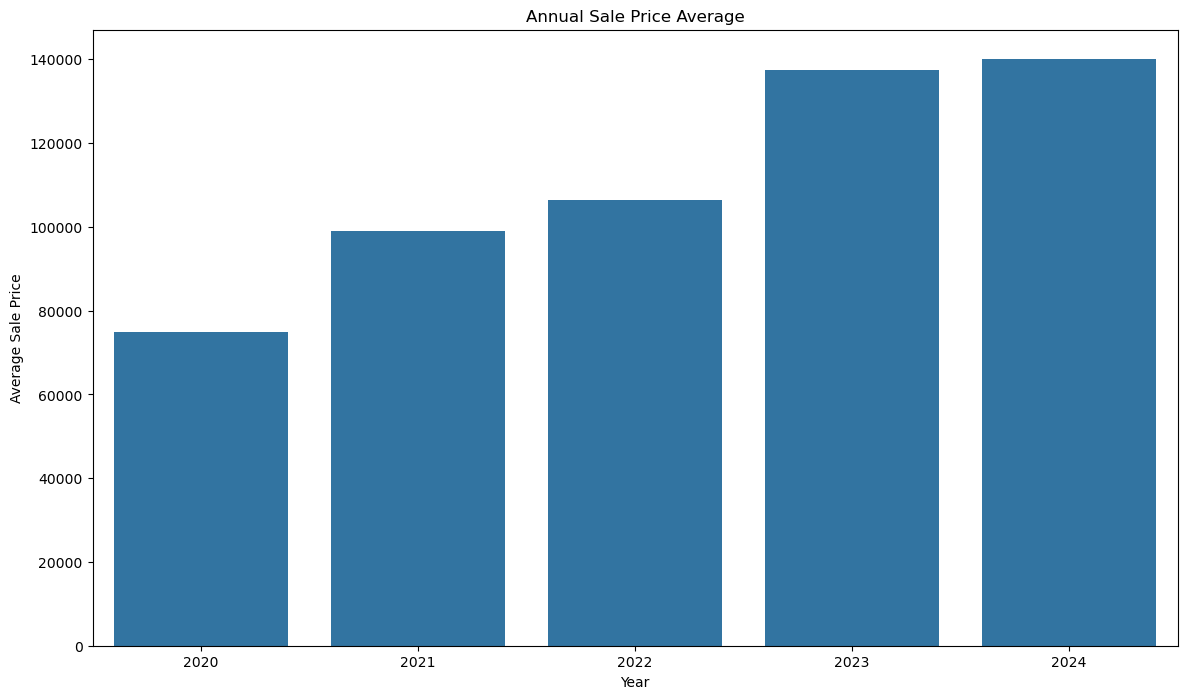

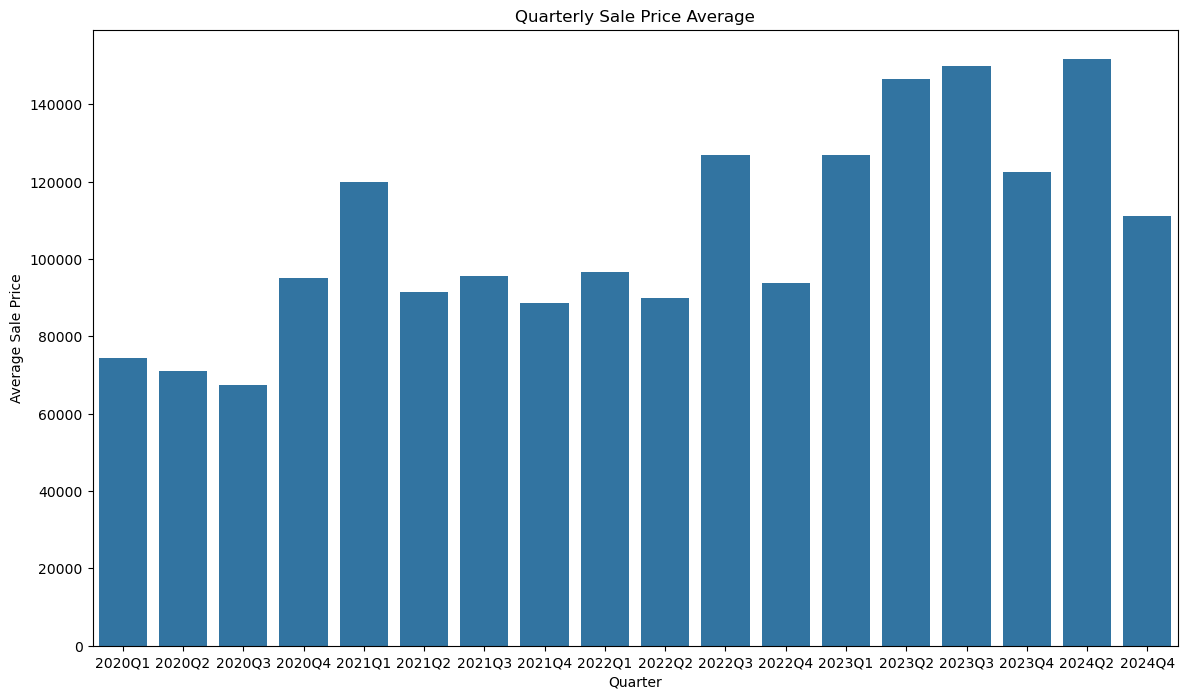

In [22]:

plt.figure(figsize=(14,8))
# Annual Sale Price Average
sns.barplot(x=annual_sale_price_avg.index, y=annual_sale_price_avg.values)
plt.title('Annual Sale Price Average')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.show()

# Quarterly Sale Price Average
plt.figure(figsize=(14,8))
sns.barplot(x=quarterly_sale_price_avg.index.astype(str), y=quarterly_sale_price_avg.values)
plt.title('Quarterly Sale Price Average')
plt.xlabel('Quarter')
plt.ylabel('Average Sale Price')
plt.show()

#### 2. Annual & Quarterly Listing Price Average

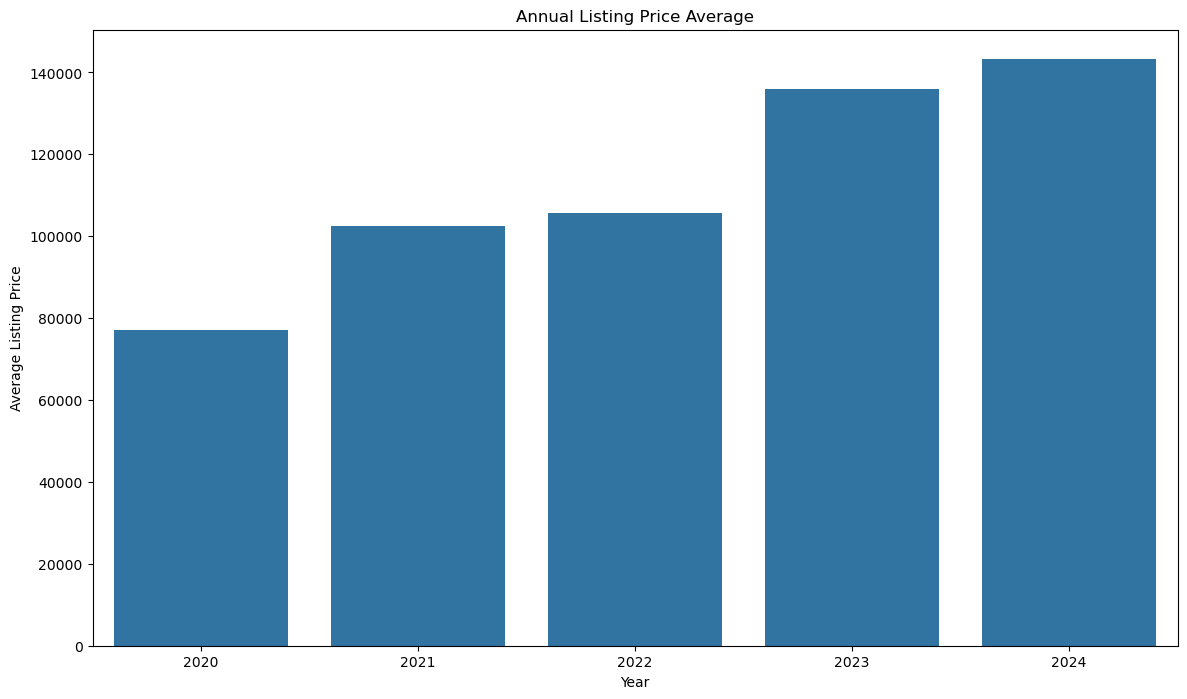

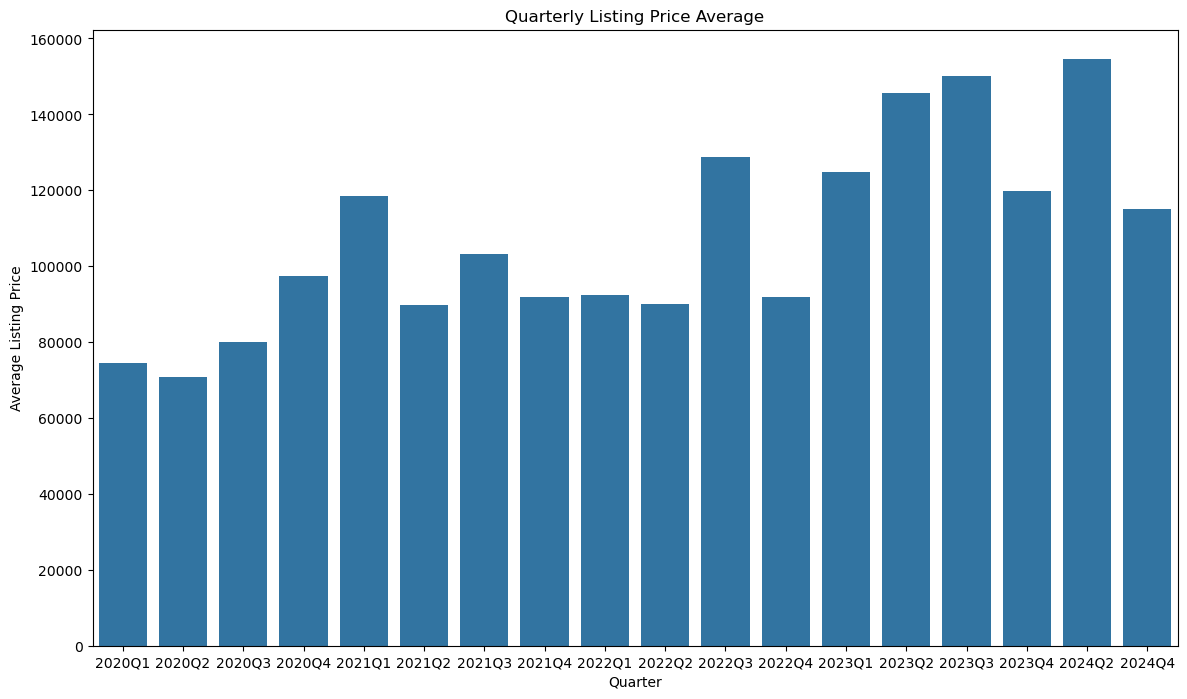

In [23]:

# Annual Listing Price Average
plt.figure(figsize=(14,8))
sns.barplot(x=annual_listing_price_avg.index, y=annual_listing_price_avg.values)
plt.title('Annual Listing Price Average')
plt.xlabel('Year')
plt.ylabel('Average Listing Price')
plt.show()

# Quarterly Listing Price Average
plt.figure(figsize=(14,8))
sns.barplot(x=quarterly_listing_price_avg.index.astype(str), y=quarterly_listing_price_avg.values)
plt.title('Quarterly Listing Price Average')
plt.xlabel('Quarter')
plt.ylabel('Average Listing Price')
plt.show()


#### 3. Annual & Quarterly DOM (Days on Market) Average

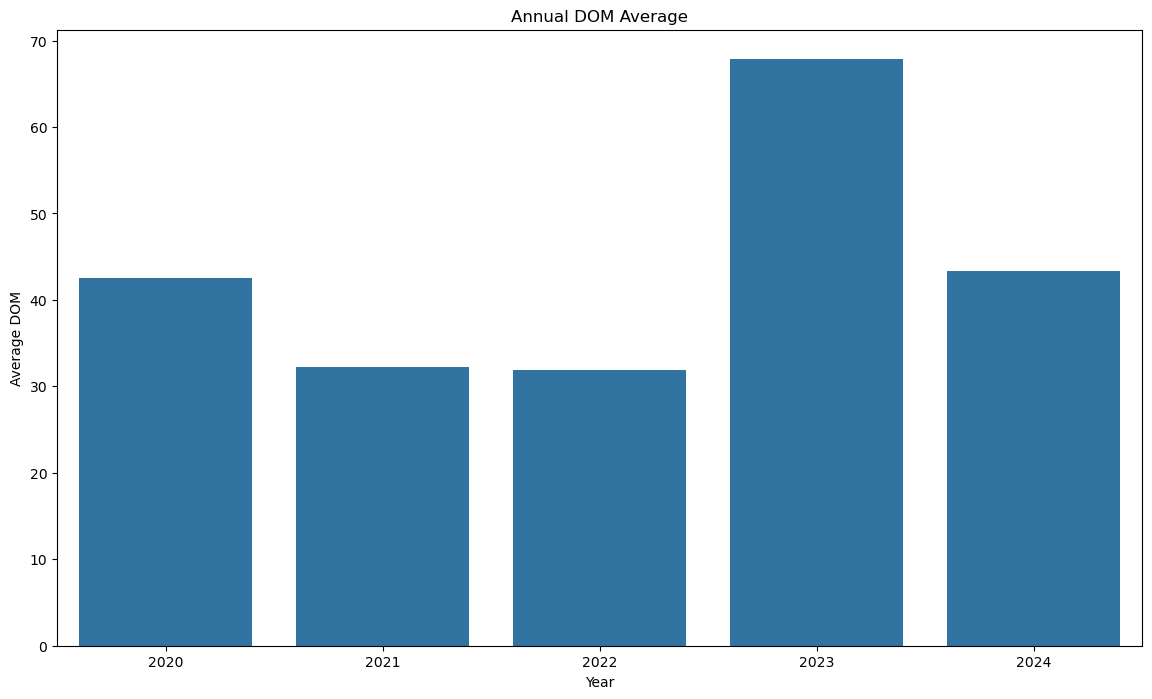

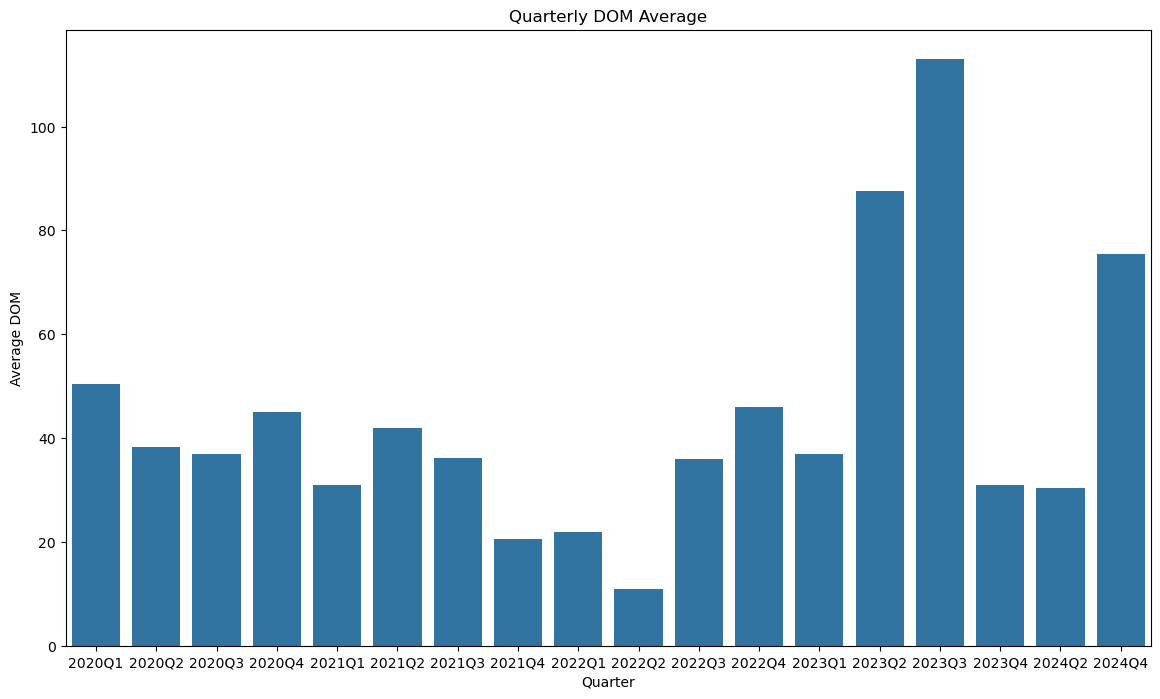

In [24]:
# Annual DOM Average
plt.figure(figsize=(14,8))
sns.barplot(x=annual_dom_avg.index, y=annual_dom_avg.values)
plt.title('Annual DOM Average')
plt.xlabel('Year')
plt.ylabel('Average DOM')
plt.show()

# Quarterly DOM Average
plt.figure(figsize=(14,8))
sns.barplot(x=quarterly_dom_avg.index.astype(str), y=quarterly_dom_avg.values)
plt.title('Quarterly DOM Average')
plt.xlabel('Quarter')
plt.ylabel('Average DOM')
plt.show()

#### 4. Average and Median Year Built

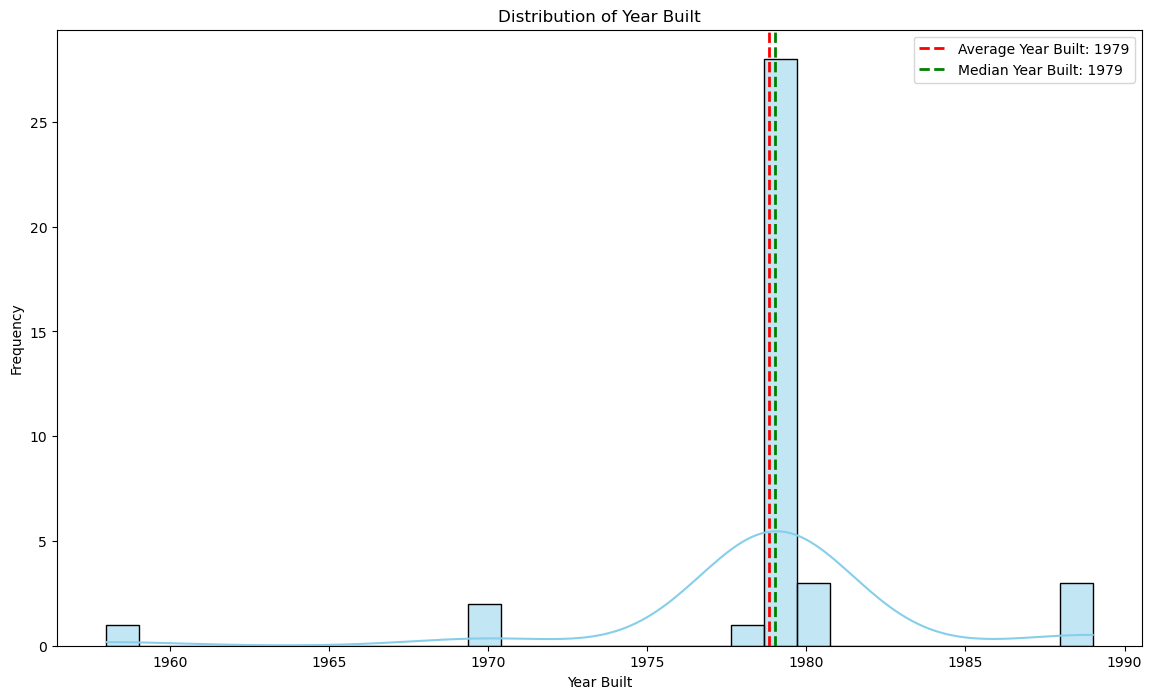

In [25]:
# Average and Median Year Built

plt.figure(figsize=(14,8))
sns.histplot(data['Year Built'], kde=True, bins=30, color="skyblue")
plt.axvline(avg_year_built, color='red', linestyle='dashed', linewidth=2, label=f'Average Year Built: {avg_year_built:.0f}')
plt.axvline(median_year_built, color='green', linestyle='dashed', linewidth=2, label=f'Median Year Built: {median_year_built:.0f}')
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Thank You